In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning'

In [3]:
df=pd.read_csv(os.path.join(path, 'Achievement 2', 'Data Sets', 'unscaled_cleaned_date.csv'), index_col=False)

In [4]:
answers=pd.read_csv(os.path.join(path, 'Achievement 1', 'Data Sets', 'Pleasant_Weather_Answers.csv'), index_col=False)

In [5]:
X=df

In [6]:
X.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0              6.5             0.8  ...                 4.9   
1              6.1             3.3  ...                 5.0   
2              8.5             5.1  ...                 4.1   
3              6.3             3.8  ...                 2.3   
4              3.0            -0.7  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 137 columns]

In [7]:
X.shape

(22950, 137)

In [8]:
answers.shape

(22950, 16)

# Data wrangling- reducing dataset to one decade (2010s)

In [9]:
# Reduce observations dataset to 2010's

dfdecade = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   
...         ...    ...                ...             ...             ...   
21910  20191227     12                  8            0.92          1.0273   
21911  20191228     12                  7            0.86          1.0380   
21912  20191229     12                  6            0.93          1.0387   
21913  20191230     12                  1            0.81          1.0354   
21914  20191231     12                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
18263              2.9            -0.2  ...                -7.0   
18264             -1.5            -4.2  ...                -7.1   
18265             -3.2            -6.0  ...                -7.1   
18266             -4.9            -8.3  ...                -3.6   
18267             -4.0            -7.1  ...                -5.5   
...                ...             ...  ...                 ...   
21910              6.8             5.6  ...                 0.2   
21911              3.7            -0.6  ...                -1.0   
21912             -0.8            -2.7  ...                 5.8   
21913              0.5            -3.0  ...                 9.6   
21914              0.4            -1.3  ...                 8.5   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
18263                     1               0.80             1.0121   
18264                     1               0.82             1.0196   
18265                     4               0.71             1.0196   
18266                     2               0.67             1.0219   
18267                     4               0.78             1.0117   
...                     ...                ...                ...   
21910                     5               0.82             1.0142   
21911                     5               0.82             1.0142   
21912                     5               0.82             1.0142   
21913                     5               0.82             1.0142   
21914                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
18263                       0.43                    0.00                6.0   
18264                       0.45                    0.00                6.0   
18265                       0.36                    0.41                1.6   
18266                       0.48                    0.51                6.5   
18267                       0.45                    0.09                4.7   
...                          ...                     ...                ...   
21910                       0.04                    0.41  

In [10]:
# Reduce answers dataset to 2010's

answers_decade = answers[(answers['DATE'].astype(str).str[:4] >= '2010') & (answers['DATE'].astype(str).str[:4] <= '2019')]
answers_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [11]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [12]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [13]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
BUDAPEST: 32868 entries
DUSSELDORF: 32868 entries
KASSEL: 32868 entries
MADRID: 32868 entries
STOCKHOLM: 32868 entries
MAASTRICHT: 32868 entries
DEBILT: 32868 entries
OSLO: 32868 entries
HEATHROW: 32868 entries
SONNBLICK: 32868 entries
VALENTIA: 32868 entries
LJUBLJANA: 32868 entries
MUNCHENB: 32868 entries
BELGRADE: 32868 entries
BASEL: 32868 entries


In [14]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

C:\Users\jphil\AppData\Local\Temp\ipykernel_15704\1265420931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)


In [15]:
dfdecade.shape # observations dataset has the correct shape

(3652, 135)

In [16]:
answers_decade.drop(columns = 'DATE', inplace = True)

C:\Users\jphil\AppData\Local\Temp\ipykernel_15704\4225983369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answers_decade.drop(columns = 'DATE', inplace = True)


In [17]:
answers_decade.shape # predictions dataset has the correct shape

(3652, 15)

# Reshaping and splitting

In [18]:
X=dfdecade

In [19]:
y=answers_decade

In [20]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


# Hyperparameter Optimization- Grid Search

In [25]:
# Create a RF classifier

clf = RandomForestClassifier()

In [26]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [27]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jphil\anaconda3\Lib\site-pac

Search took 42.22967034975688 minutes


In [28]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6400146038700255


# Random Search

In [29]:
# Define random search cv

rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(150, 250, step=25),  # Focusing on around the best n_estimators
    'max_features': randint(30, 70),  # Adjusting to a narrower range based on grid search
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4), 
    'min_samples_split': np.arange(2, 10, step=2) 
}

In [30]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [31]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 5.367429304122925 minutes


In [32]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6400146038700255
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 60, 'max_features': 69, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175}
Best RANDOM search score is: 0.6422051843738591


# Running Random Forest with Optimized Search Parameters

In [34]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 175, max_depth=60, max_features=69, min_samples_leaf=1, min_samples_split=2, criterion='gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, max_features=69, n_estimators=175)

In [35]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.664841182913472


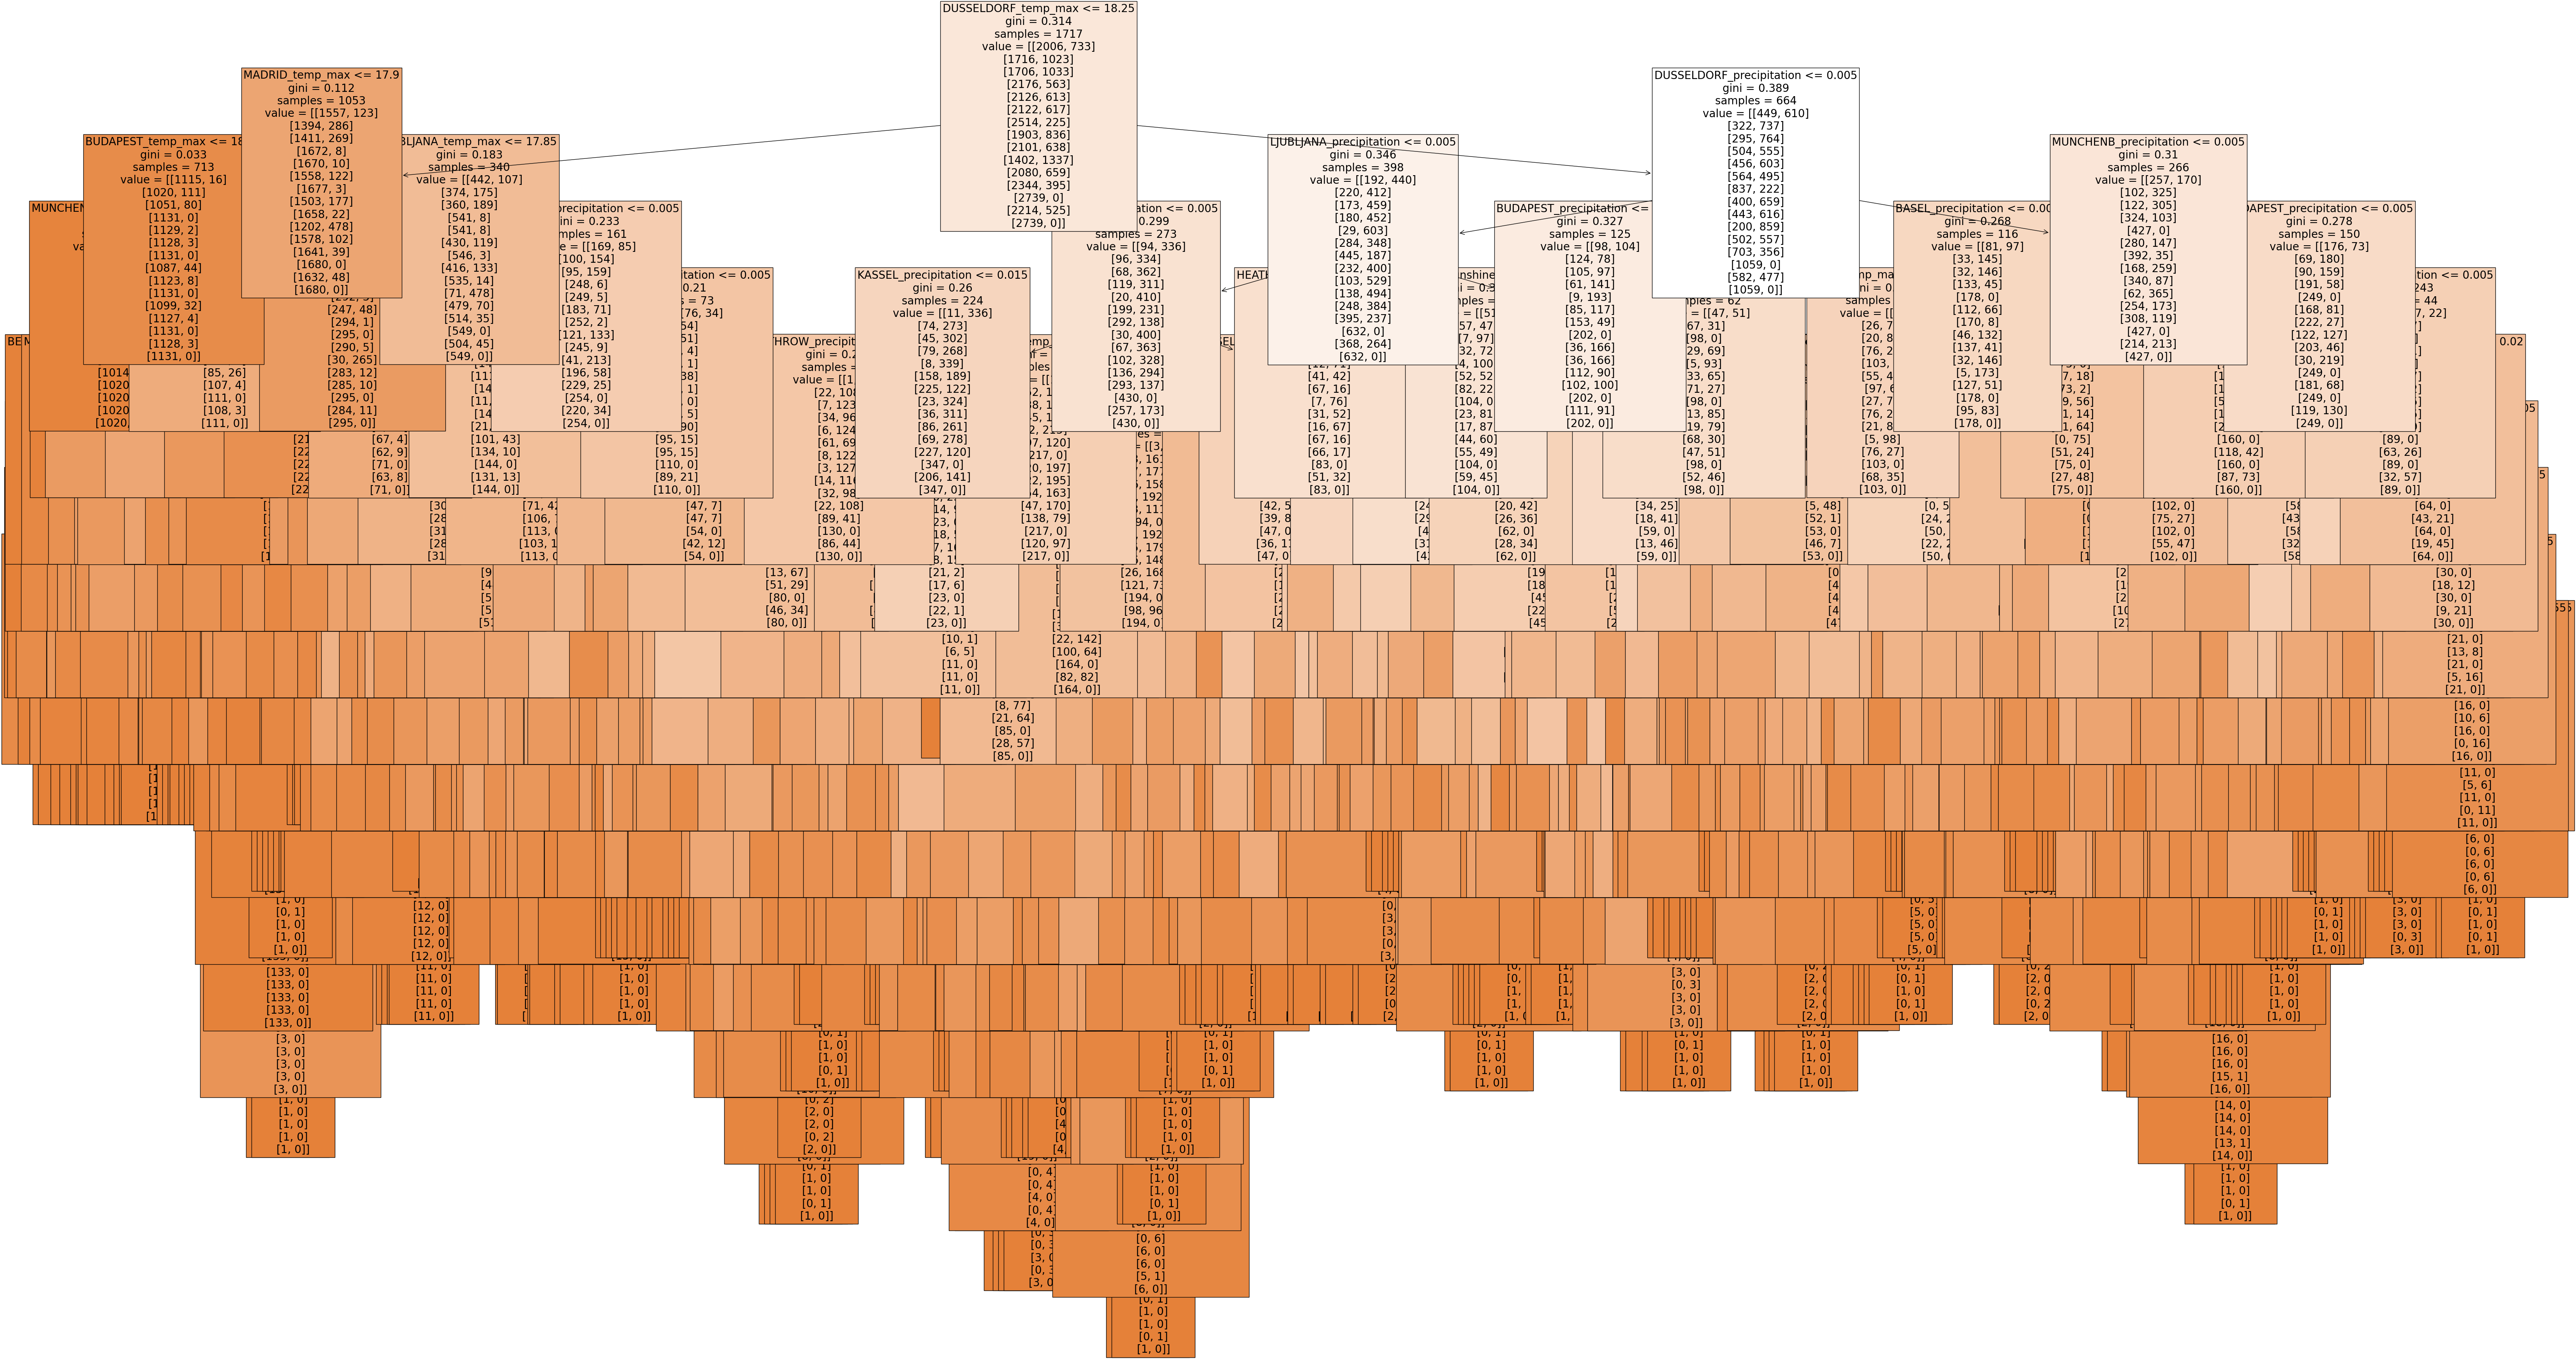

In [36]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [37]:
fig.savefig(os.path.join(path, 'Achievement 2', 'Analysis', 'Visualizations','optimized_random_forest_2010s.png'), bbox_inches='tight')

# Uncovering Feature Importances

In [38]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.46175188e-03, 2.38482307e-03, 1.99322375e-03, 2.18144375e-03,
       2.95987195e-02, 3.79377335e-03, 5.20521461e-03, 1.75042600e-03,
       7.40040341e-02, 2.29855346e-03, 2.29274295e-03, 2.30791429e-03,
       1.92981890e-03, 2.85421679e-02, 2.13841344e-03, 3.29335646e-03,
       1.85876833e-03, 9.95035074e-03, 2.54227579e-04, 0.00000000e+00,
       0.00000000e+00, 8.98676249e-04, 2.74607824e-02, 8.35786831e-04,
       4.50655696e-03, 1.94647815e-03, 1.97080984e-02, 1.38114741e-03,
       1.90913724e-03, 2.02495016e-03, 2.43431584e-03, 1.72912291e-02,
       2.65705282e-03, 2.14125864e-03, 2.13978511e-03, 2.77787085e-02,
       1.18658000e-03, 1.83061326e-03, 2.00891740e-03, 2.04703827e-03,
       3.55192462e-02, 2.30276713e-03, 2.07013786e-03, 1.88464043e-03,
       1.62065184e-01, 1.86116196e-03, 2.91622078e-03, 2.12935455e-03,
       3.23755970e-03, 1.44898868e-02, 3.66324023e-03, 2.63872420e-03,
       1.86630867e-03, 9.22668980e-03, 1.17682488e-03, 1.68536546e-03,
      

In [39]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.46175188e-03, 2.38482307e-03, 1.99322375e-03, 2.18144375e-03,
         2.95987195e-02, 3.79377335e-03, 5.20521461e-03, 1.75042600e-03,
         7.40040341e-02],
        [2.29855346e-03, 2.29274295e-03, 2.30791429e-03, 1.92981890e-03,
         2.85421679e-02, 2.13841344e-03, 3.29335646e-03, 1.85876833e-03,
         9.95035074e-03],
        [2.54227579e-04, 0.00000000e+00, 0.00000000e+00, 8.98676249e-04,
         2.74607824e-02, 8.35786831e-04, 4.50655696e-03, 1.94647815e-03,
         1.97080984e-02],
        [1.38114741e-03, 1.90913724e-03, 2.02495016e-03, 2.43431584e-03,
         1.72912291e-02, 2.65705282e-03, 2.14125864e-03, 2.13978511e-03,
         2.77787085e-02],
        [1.18658000e-03, 1.83061326e-03, 2.00891740e-03, 2.04703827e-03,
         3.55192462e-02, 2.30276713e-03, 2.07013786e-03, 1.88464043e-03,
         1.62065184e-01],
        [1.86116196e-03, 2.91622078e-03, 2.12935455e-03, 3.23755970e-03,
         1.44898868e-02, 3.66324023e-03, 2.63872420e-03, 1.86630867

In [40]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.12237341, 0.05461209, 0.05561061, 0.05975758, 0.21091512,
       0.04202915, 0.02622885, 0.07126948, 0.11604867, 0.07948378,
       0.06310042, 0.04342813, 0.01674746, 0.03553979, 0.00285546])

In [41]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [42]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [43]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [44]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

STOCKHOLM     0.210915
BUDAPEST      0.122373
HEATHROW      0.116049
SONNBLICK     0.079484
OSLO          0.071269
VALENTIA      0.063100
MADRID        0.059758
KASSEL        0.055611
DUSSELDORF    0.054612
LJUBLJANA     0.043428
MAASTRICHT    0.042029
BELGRADE      0.035540
DEBILT        0.026229
MUNCHENB      0.016747
BASEL         0.002855
dtype: float64

In [45]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BUDAPEST', 'DUSSELDORF', 'KASSEL', 'MADRID', 'STOCKHOLM', 'MAASTRICHT', 'DEBILT', 'OSLO', 'HEATHROW', 'SONNBLICK', 'VALENTIA', 'LJUBLJANA', 'MUNCHENB', 'BELGRADE', 'BASEL']


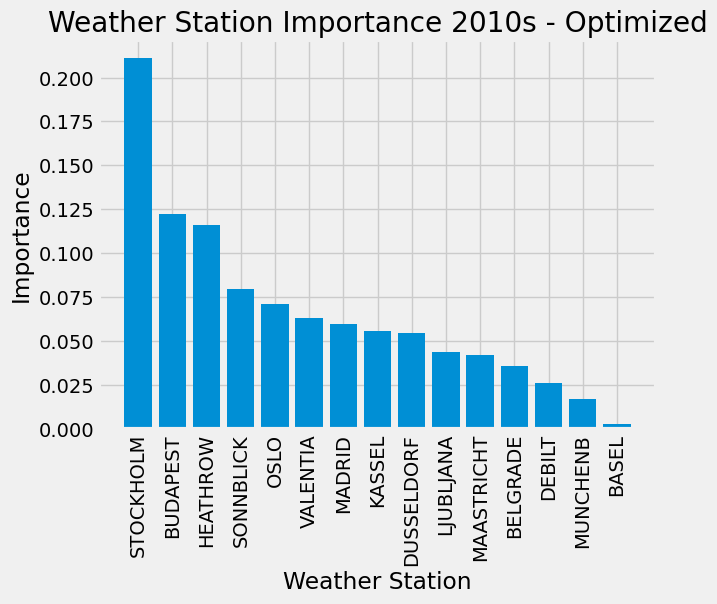

In [46]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path, 'Achievement 2', 'Analysis', 'Visualizations','optimized_featureimportance_2010s.png'), bbox_inches='tight')

plt.show()

# Random Forest for Stockholm Data (all years)

In [47]:
# Filter weather dataset to only include Stockholm
df_stockholm = df[df.columns[df.columns.astype(str).str.startswith('STOCKHOLM')]]

df_stockholm

STOCKHOLM_cloud_cover  STOCKHOLM_humidity  STOCKHOLM_pressure  \
0                          5                0.98              1.0114   
1                          5                0.62              1.0114   
2                          5                0.69              1.0114   
3                          5                0.98              1.0114   
4                          5                0.96              1.0114   
...                      ...                 ...                 ...   
22945                      5                0.98              1.0161   
22946                      5                1.00              1.0122   
22947                      5                0.85              1.0059   
22948                      5                0.94              1.0160   
22949                      5                0.97              1.0164   

       STOCKHOLM_global_radiation  STOCKHOLM_precipitation  \
0                            0.05                     0.32   
1                            0.05                     0.06   
2                            0.05                     0.02   
3                            0.05                     0.00   
4                            0.05                     1.32   
...                           ...                      ...   
22945                        1.11                     0.14   
22946                        1.11                     0.14   
22947                        1.11                     0.14   
22948                        1.11                     0.14   
22949                        1.11                     0.14   

       STOCKHOLM_sunshine  STOCKHOLM_temp_mean  STOCKHOLM_temp_min  \
0                     0.0                  4.2                 2.2   
1                     0.0                  4.0                 3.0   
2                     0.0                  2.4                 1.3   
3                     0.0                  1.2                 0.4   
4                     0.0                  3.3                 0.8   
...                   ...                  ...                 ...   
22945                 3.2                 11.5                 8.2   
22946                 0.8                 12.5                11.0   
22947                 6.9                 13.1                12.1   
22948                 8.4                  7.5                 5.1   
22949                 0.4                  9.7                 5.0   

       STOCKHOLM_temp_max  
0                     4.9  
1                     5.0  
2                     4.1  
3                     2.3  
4                     4.3  
...                   ...  
22945                14.2  
22946                14.3  
22947                14.4  
22948                12.4  
22949                12.6  

[22950 rows x 9 columns]

In [49]:
# Filter pleasant dataset to only include Stockholm
pleasant_stock = answers[answers.columns[answers.columns.astype(str).str.startswith('STOCKHOLM')]]

pleasant_stock

STOCKHOLM_pleasant_weather
0                               0
1                               0
2                               0
3                               0
4                               0
...                           ...
22945                           0
22946                           0
22947                           0
22948                           0
22949                           0

[22950 rows x 1 columns]

In [50]:
# Create matrices
y2 = pleasant_stock.max(axis=1)

y2.shape

(22950,)

In [51]:
# Create X matrix
X2 = df_stockholm.to_numpy()

# Check shapes of the matrices
print(X2.shape)
print(y2.shape)

(22950, 9)
(22950,)


In [52]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [53]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [54]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


# Hyperparameter Optimization- Random Search

In [56]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  
    'n_estimators': np.arange(100, 300, step=50),  
    'max_features': randint(2, 5),  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': np.arange(2, 10, step=2)  
}

In [57]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [58]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 2.8883212089538572 minutes


In [59]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 150}
Best RANDOM search score is: 1.0


# Running Random Forest with Optimized Search Parameters

In [60]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 150, max_depth=6, max_features=3, min_samples_leaf=2, min_samples_split=8, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=3,
                       min_samples_leaf=2, min_samples_split=8,
                       n_estimators=150)

In [61]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


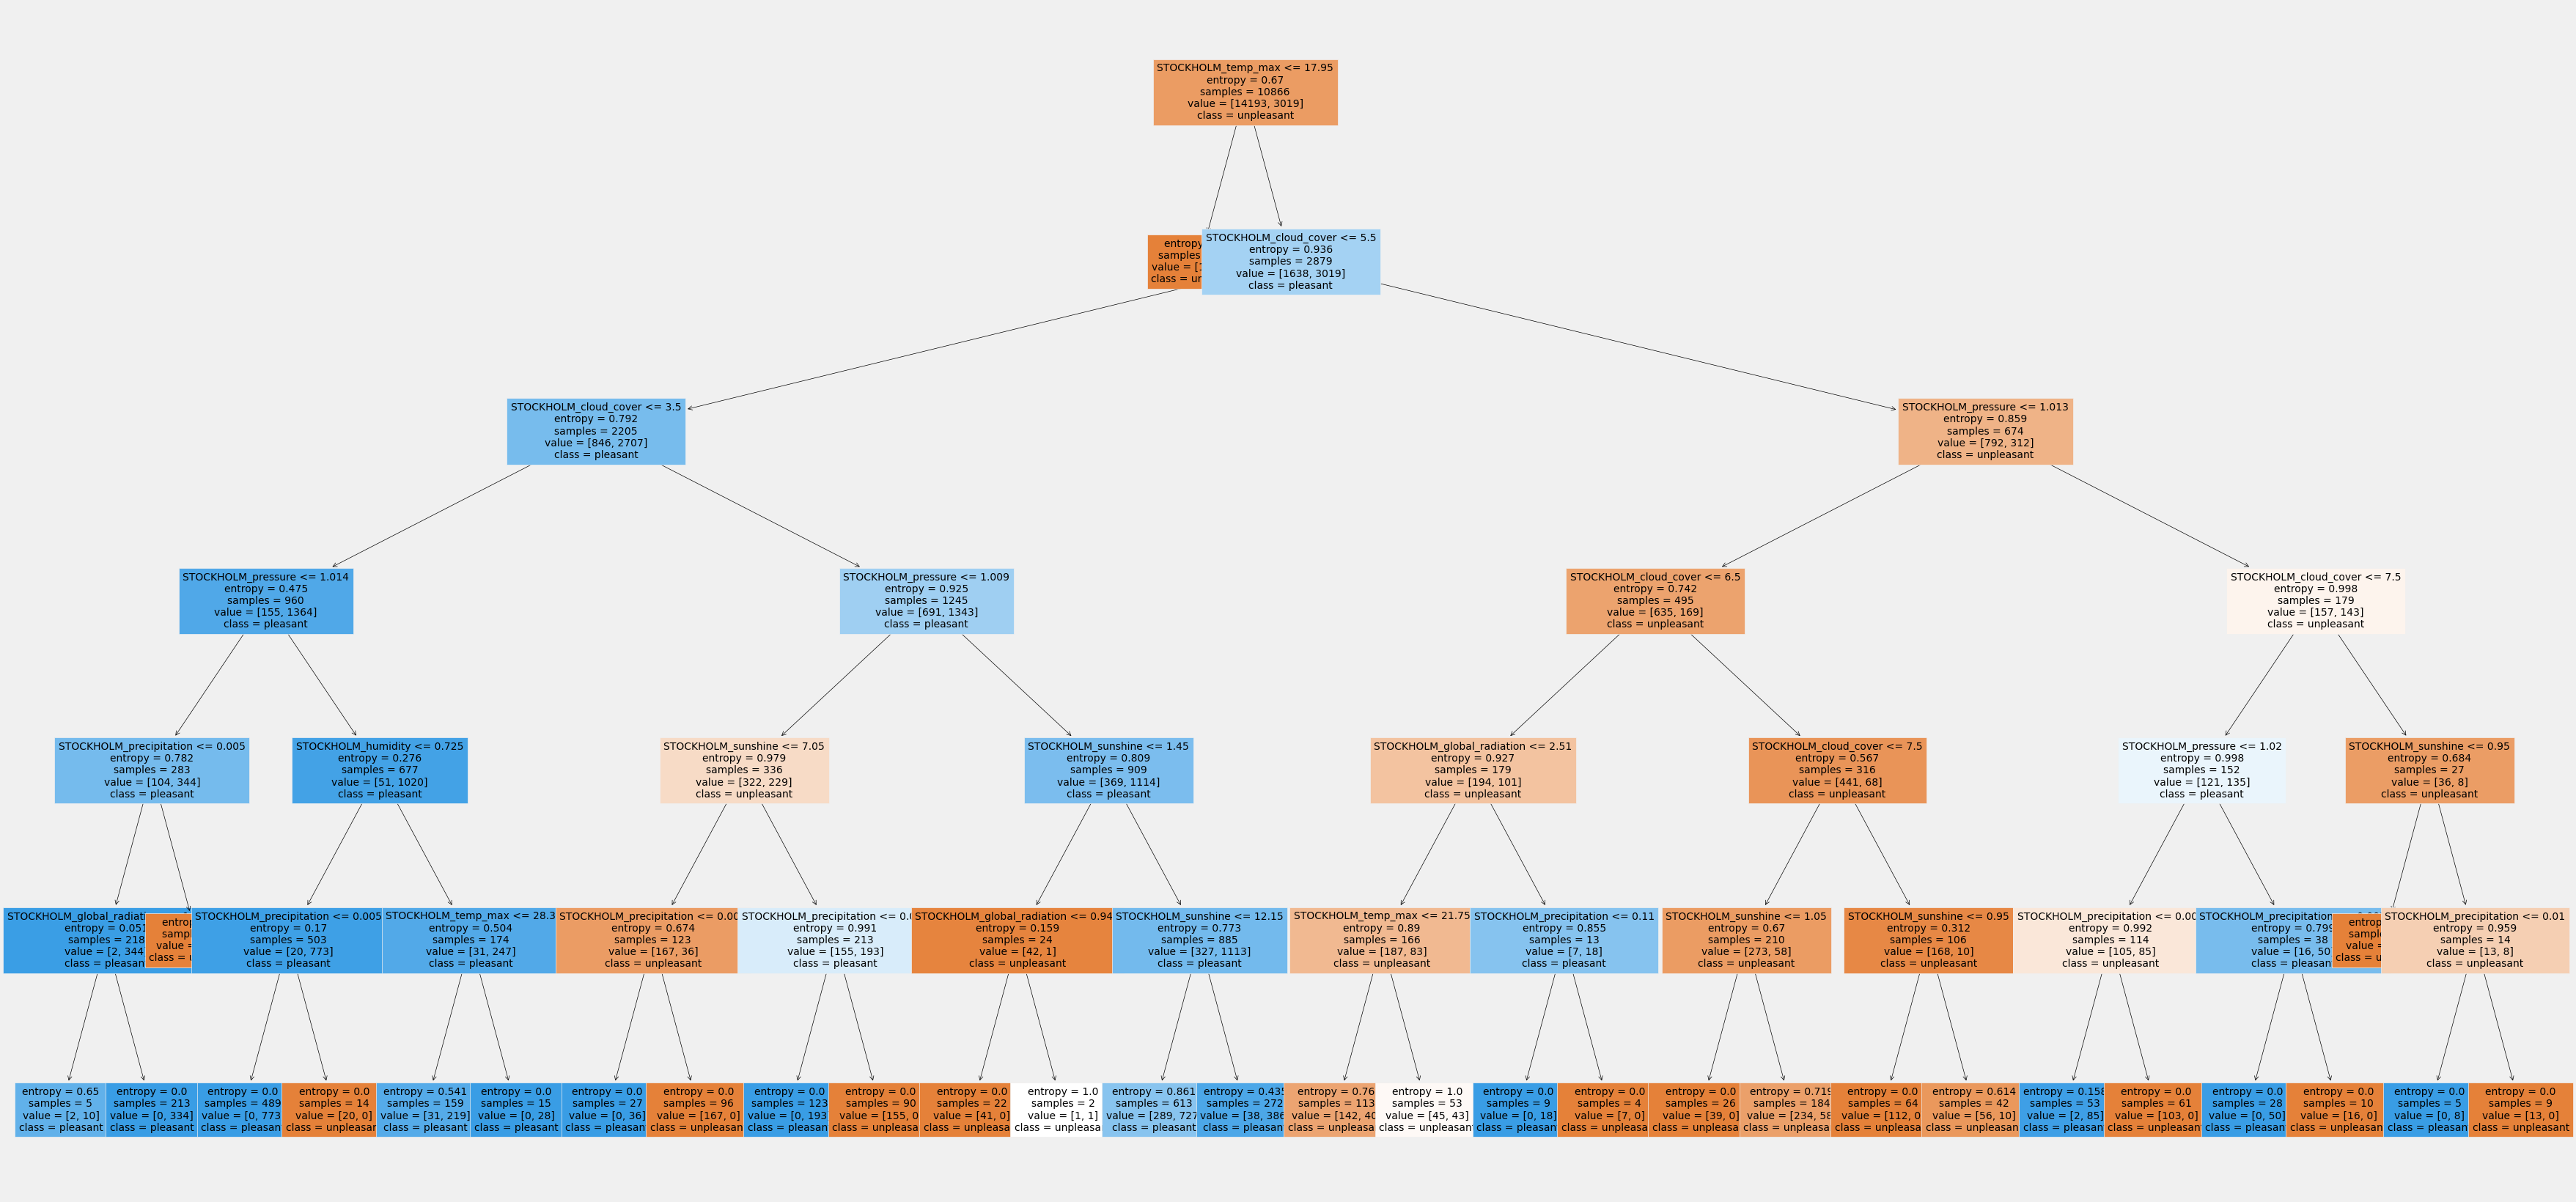

In [63]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf3.estimators_[6], fontsize = 10, feature_names = df_stockholm.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [64]:
fig.savefig(os.path.join(path, 'Achievement 2', 'Analysis', 'Visualizations','optimized_random_forest_stockholm.png'),bbox_inches='tight')

# Uncovering Feature Importances

In [65]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.012176  , 0.00088438, 0.00877367, 0.06892024, 0.25469146,
       0.06014765, 0.177165  , 0.09249452, 0.32474709])

In [66]:
# Retrieve feature importances from the trained model
stock_importance = clf3.feature_importances_
print("Feature Importances:", stock_importance)
print(stock_importance.shape)

Feature Importances: [0.012176   0.00088438 0.00877367 0.06892024 0.25469146 0.06014765
 0.177165   0.09249452 0.32474709]
(9,)


In [67]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [71]:
# Create a dataframe to associate observation measurements with their importances
stock_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': stock_importance
})

In [72]:
# Sort by importance for chart readability
stock_importance = stock_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(stock_importance)

Feature Importance:
        Measurement  Importance
8          temp_max    0.324747
4     precipitation    0.254691
6         temp_mean    0.177165
7          temp_min    0.092495
3  global_radiation    0.068920
5          sunshine    0.060148
0       cloud_cover    0.012176
2          pressure    0.008774
1          humidity    0.000884


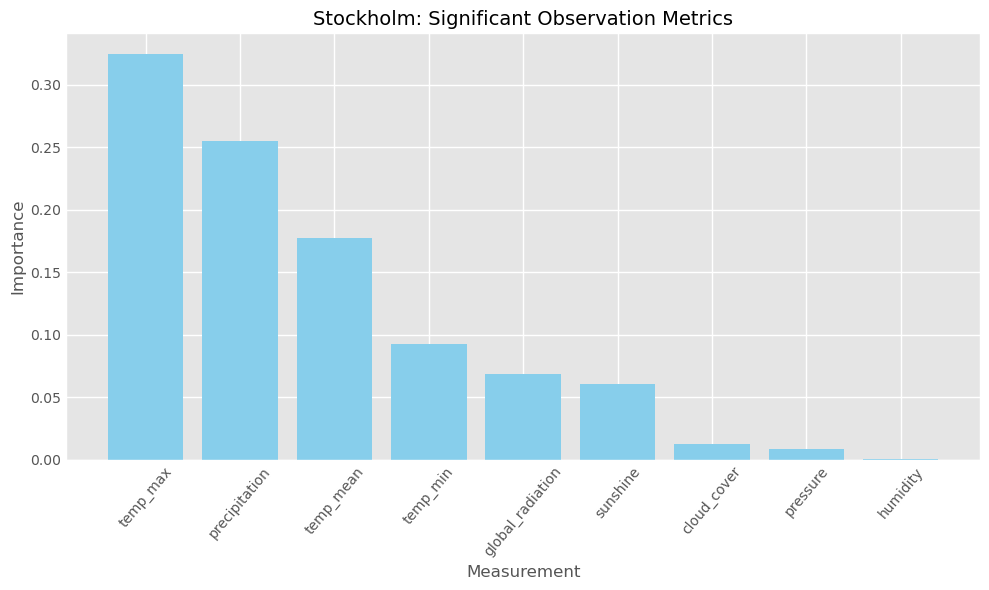

In [74]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(stock_importance['Measurement'], stock_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Stockholm: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Achievement 2', 'Analysis', 'Visualizations','optimized_featureimportance_stockholm.png'), bbox_inches='tight')
plt.show()